In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os,sys
sys.path.append(os.path.abspath('./../../'))
from cell_extractor import utils 
from cell_extractor.diagnostics.ToolKit import get_DataFrame_from_query_result,find_equivalence,find_agreement,get_DataFrame_from_detection_df
from Controllers.MarkedCellController import MarkedCellController
from Controllers.SqlController import SqlController
import pandas as pd
from cell_extractor.CellAnnotationUtilities import CellAnnotationUtilities
from cell_extractor.AnnotationProximityTool import AnnotationProximityTool
from matplotlib.patches import Patch
from collections import Counter


In [3]:
utils.print_single_threshold_sure_and_unsure_count('DK41',threshold=2000,round=4)


4873 4175


In [4]:
animal = 'DK41'
sures,unsure,nodetection = utils.get_single_threshold_sure_and_unsure(animal,2000,round=3)
detections = pd.concat([sures,unsure,nodetection])

suresr2 = get_DataFrame_from_detection_df(sures,'sures_round2')
unsuresr2 = get_DataFrame_from_detection_df(unsure,'unsures_round2')
nodetectionr2 = get_DataFrame_from_detection_df(nodetection,'no_detection_round2')

In [5]:
controller = SqlController()
factor = controller.get_resolution(animal)
controller = MarkedCellController()
search_dict = {'FK_prep_id':animal,'FK_cell_type_id':16}
round3_sures = get_DataFrame_from_query_result(controller.get_marked_cells(search_dict),'Sure',factor)
round3_sures_tool = find_equivalence(round3_sures)
search_dict = {'FK_prep_id':animal,'FK_cell_type_id':17}
round3_unsures = get_DataFrame_from_query_result(controller.get_marked_cells(search_dict),'Unsure',factor)
round3_unsures_tool = find_equivalence(round3_unsures)
search_dict = {'FK_prep_id':animal,'FK_cell_type_id':19}
connected = get_DataFrame_from_query_result(controller.get_marked_cells(search_dict),'Connected',factor)
connected_tool = find_equivalence(connected)
search_dict = {'FK_prep_id':animal,'FK_cell_type_id':18}
false_negatives = get_DataFrame_from_query_result(controller.get_marked_cells(search_dict),'False_negative',factor)
false_negatives_tool = find_equivalence(false_negatives,distance=5)


calculating distance matrix
finding points that are close to each other
grouping and labeling points that are close to each other
before removing duplicates 1000
after removing duplicates 500
calculating distance matrix
finding points that are close to each other
grouping and labeling points that are close to each other
before removing duplicates 8982
after removing duplicates 4491
calculating distance matrix
finding points that are close to each other
grouping and labeling points that are close to each other
before removing duplicates 43
after removing duplicates 43
calculating distance matrix
finding points that are close to each other
grouping and labeling points that are close to each other
before removing duplicates 917
after removing duplicates 778


In [7]:
positive = [['Sure_Marissa_POSITIVE', 'Sure_Julian_POSITIVE']]
negative = [['Sure_Marissa_NEGATIVE', 'Sure_Julian_NEGATIVE']]
disagree = [['Sure_Marissa_NEGATIVE', 'Sure_Julian_POSITIVE'],['Sure_Marissa_POSITIVE', 'Sure_Julian_NEGATIVE']]
round3_sure_positive = round3_sures_tool.find_annotation_in_category(positive)
round3_sure_negative = round3_sures_tool.find_annotation_in_category(negative)
round3_sure_disagree = round3_sures_tool.find_annotation_in_category(disagree)

In [8]:
positive = [['Unsure_Marissa_POSITIVE', 'Unsure_Julian_POSITIVE']]
negative = [['Unsure_Marissa_NEGATIVE', 'Unsure_Julian_NEGATIVE']]
disagree = [['Unsure_Marissa_POSITIVE', 'Unsure_Julian_NEGATIVE'],['Unsure_Marissa_NEGATIVE', 'Unsure_Julian_POSITIVE']]
round3_unsure_positive = round3_unsures_tool.find_annotation_in_category(positive)
round3_unsure_negative = round3_unsures_tool.find_annotation_in_category(negative)
round3_unsure_disagree = round3_unsures_tool.find_annotation_in_category(disagree)

In [9]:
agree = [['False_negative_Julian_POSITIVE', 'False_negative_Marissa_POSITIVE'],]
disagree = [['False_negative_Julian_POSITIVE'],['False_negative_Marissa_POSITIVE']]
false_negatives_agreed,false_negatives_disagreed = find_agreement(false_negatives_tool,agree,disagree)

In [10]:
def get_features_in_subcategory(big_category,subcatgory,max_distance=20):
    more_points = np.array([big_category.col,big_category.row,big_category.section]).T.astype(float)
    less_points = np.array([subcatgory.x,subcatgory.y,subcatgory.section]).T.astype(float)
    util = CellAnnotationUtilities()
    ids = util.find_cloest_neighbor_among_points(more_points,less_points,max_distance=max_distance)
    return big_category.iloc[ids]


In [16]:
controller = SqlController()
factor = controller.get_resolution(animal)
controller = MarkedCellController()
search_dict = {'FK_prep_id':animal,'FK_cell_type_id':1,'FK_annotator_id':2}
r4_beth_positives = get_DataFrame_from_query_result(controller.get_marked_cells(search_dict),'Original',factor)
search_dict = {'FK_prep_id':animal,'FK_cell_type_id':22,'FK_annotator_id':38}
r4_sure = get_DataFrame_from_query_result(controller.get_marked_cells(search_dict),'Sure',factor)
search_dict = {'FK_prep_id':animal,'FK_cell_type_id':23,'FK_annotator_id':38}
r4_unsure = get_DataFrame_from_query_result(controller.get_marked_cells(search_dict),'Unsure',factor)

r4_positives = pd.concat([r4_beth_positives,r4_sure[r4_sure.name=='Sure_Marissa_POSITIVE'],r4_unsure[r4_unsure.name=='Unsure_Marissa_POSITIVE']])
r4_negative = pd.concat([r4_sure[r4_sure.name=='Sure_Marissa_NEGATIVE'],r4_unsure[r4_unsure.name=='Unsure_Marissa_NEGATIVE']])

In [18]:
r4_positives_features = get_features_in_subcategory(detections,r4_positives,max_distance=300)
r4_negative_features = get_features_in_subcategory(detections,r4_negative,max_distance=300)

In [11]:
sure_positive_features = get_features_in_subcategory(detections,round3_sure_positive)
sure_negative_features = get_features_in_subcategory(detections,round3_sure_negative)
sure_disagree_features = get_features_in_subcategory(detections,round3_sure_disagree)

unsure_positive_features = get_features_in_subcategory(detections,round3_unsure_positive)
unsure_negative_features = get_features_in_subcategory(detections,round3_unsure_negative)
unsure_disagree_features = get_features_in_subcategory(detections,round3_unsure_disagree)

false_negative_agreed = get_features_in_subcategory(detections,false_negatives_agreed,max_distance=300)
false_negative_disagreed = get_features_in_subcategory(detections,false_negatives_disagreed,max_distance=300)


1000
skipping, min distance 561.0641199948174
skipping, min distance 389.2118271462628
skipping, min distance 903.4768346610947
skipping, min distance 967.3565517557864
skipping, min distance 443.36755959295226
skipping, min distance 320.9143187830671
skipping, min distance 436.86578714330506
skipping, min distance 3598.805551879219
skipping, min distance 2378.5343225006477
skipping, min distance 3360.1724956074336
skipping, min distance 1854.6654624895316
skipping, min distance 1229.6561559131676
skipping, min distance 7135.933593188108
skipping, min distance 5733.215143107728
skipping, min distance 725.5794542148342
skipping, min distance 376.7268629003907
skipping, min distance 318.24675960644123
skipping, min distance 1531.3898240278634
skipping, min distance 971.5317040997726
skipping, min distance 512.9801168044296
skipping, min distance 2438.3004516556975
skipping, min distance 347.54361183912425
skipping, min distance 322.4605292115644
skipping, min distance 438.81552808931656


In [12]:
print(f'sures {len(sure_positive_features),len(sure_negative_features),len(sure_disagree_features)}')
print(f'unsures {len(unsure_positive_features),len(unsure_negative_features),len(unsure_disagree_features)}')
print(f'false neg {len(false_negative_agreed),len(false_negative_disagreed)}')

sures (196, 48, 56)
unsures (266, 1011, 63)
false neg (137, 608)


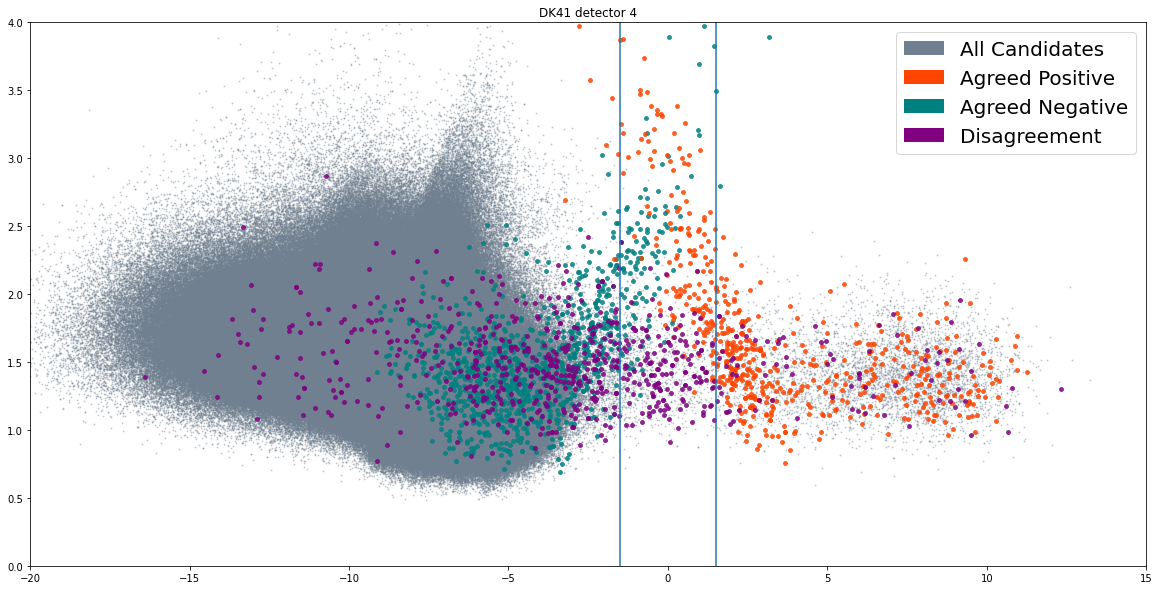

In [21]:
plt.figure(figsize=[20,10])
plt.title('DK41 detector 4')
alpha = 0.8
size = 15
plt.scatter(detections['mean_score'].to_numpy(),detections['std_score'].to_numpy(),color='slategrey',s=1,alpha=0.3)
plt.scatter(sure_positive_features['mean_score'].to_numpy(),sure_positive_features['std_score'].to_numpy(),color='orangered',s=size,alpha=alpha)
plt.scatter(unsure_positive_features['mean_score'].to_numpy(),unsure_positive_features['std_score'].to_numpy(),color='orangered',s=size,alpha=alpha)
plt.scatter(sure_negative_features['mean_score'].to_numpy(),sure_negative_features['std_score'].to_numpy(),color='teal',s=size,alpha=alpha)
plt.scatter(unsure_negative_features['mean_score'].to_numpy(),unsure_negative_features['std_score'].to_numpy(),color='teal',s=size,alpha=alpha)
plt.scatter(false_negative_agreed['mean_score'].to_numpy(),false_negative_agreed['std_score'].to_numpy(),color='orangered',s=size,alpha=alpha)
plt.scatter(false_negative_disagreed['mean_score'].to_numpy(),false_negative_disagreed['std_score'].to_numpy(),color='purple',s=size,alpha=alpha)
plt.scatter(sure_disagree_features['mean_score'].to_numpy(),sure_disagree_features['std_score'].to_numpy(),color='purple',s=size,alpha=alpha)
plt.scatter(unsure_disagree_features['mean_score'].to_numpy(),unsure_disagree_features['std_score'].to_numpy(),color='purple',s=size,alpha=alpha)
# plt.scatter(r4_positives_features['mean_score'].to_numpy(),r4_positives_features['std_score'].to_numpy(),color='red',s=size,alpha=alpha)
# plt.scatter(r4_negative_features['mean_score'].to_numpy(),r4_negative_features['std_score'].to_numpy(),color='blue',s=size,alpha=alpha)
plt.xlim([-20,15])
plt.ylim([0,4])
plt.axvline(-1.5)
plt.axvline(1.5)
labels = []
labels.append(Patch(facecolor='slategrey',label='All Candidates'))
labels.append(Patch(facecolor='orangered',label='Agreed Positive'))
labels.append(Patch(facecolor='teal',label='Agreed Negative'))
labels.append(Patch(facecolor='purple',label='Disagreement'))
# labels.append(Patch(facecolor='red',label='New positives'))
# labels.append(Patch(facecolor='blue',label='New Negatives'))

plt.legend(handles=labels,prop={'size':20})

In [ ]:
plt.figure(figsize=[20,10])
plt.title('DK41 detector 4')
alpha = 0.8
size = 15
# plt.scatter(r4_positives_features['mean_score'].to_numpy(),r4_positives_features['std_score'].to_numpy(),color='red',s=size,alpha=alpha)
# plt.scatter(r4_negative_features['mean_score'].to_numpy(),r4_negative_features['std_score'].to_numpy(),color='blue',s=size,alpha=alpha)
plt.xlim([-20,15])
plt.ylim([0,4])
plt.axvline(-1.5)
plt.axvline(1.5)
labels = []
# labels.append(Patch(facecolor='red',label='New positives'))
# labels.append(Patch(facecolor='blue',label='New Negatives'))

plt.legend(handles=labels,prop={'size':20})